In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Telco_Customer_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

Zbiór danych Telco Customer Churn zawiera informacje o klientach firmy telekomunikacyjnej, obejmujące dane demograficzne, typy usług, szczegóły rozliczeń oraz kolumnę docelową Churn wskazującą, czy klient odszedł. Poniżej szczegółowy opis wszystkich kolumn.  

🔹 Identyfikacja klienta  
- customerID – unikalny identyfikator klienta.  
🔹 Dane demograficzne  
- Gender: płeć klienta
- SeniorCitizen – czy klient jest seniorem (1 = tak, 0 = nie).  
- Partner – czy klient ma partnera (Yes/No).  
- Dependents – czy klient ma osoby na utrzymaniu (Yes/No).  
  
🔹 Informacje o umowie  
- tenure – liczba miesięcy, przez które klient korzystał z usług.  
- Contract – typ umowy: Month-to-month, One year, Two year.  
- PaperlessBilling – czy klient korzysta z e-faktur (Yes/No).  
- PaymentMethod – metoda płatności: Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic).  
  
🔹 Usługi telefoniczne i internetowe  
- PhoneService – czy klient ma usługę telefoniczną (Yes/No).  
- MultipleLines – czy klient ma wiele linii telefonicznych (Yes/No/No phone service).  
- InternetService – dostawca internetu: DSL, Fiber optic, No.  
- OnlineSecurity – czy klient ma usługę zabezpieczeń online (Yes/No/No internet service).  
- OnlineBackup – czy klient ma usługę backupu online (Yes/No/No internet service).  
- DeviceProtection – czy klient ma ochronę urządzeń (Yes/No/No internet service).  
- TechSupport – czy klient ma wsparcie techniczne (Yes/No/No internet service).  
- StreamingTV – czy klient korzysta z telewizji streamingowej (Yes/No/No internet service).  
- StreamingMovies – czy klient korzysta z filmów streamingowych (Yes/No/No internet service).  
  
🔹 Rozliczenia  
- MonthlyCharges – miesięczna opłata (wartość numeryczna).  
- TotalCharges – całkowite opłaty poniesione przez klienta (wartość numeryczna, czasem wczytywana jako tekst).  
  
🔹 Zmienna docelowa  
- Churn – czy klient odszedł w ostatnim miesiącu (Yes/No).



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Aktualizuje nazwy kolumn, żeby były jednolite
df = df.rename(columns={"customerID": "CustomerID", "gender":"Gender", "tenure":"Tenure"})
df.columns

Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# Sprawdzam wystąpienie duplikatów
print(f'Liczba zduplikowanych wierszy w DataFrame: {df.duplicated().sum()}')

Liczba zduplikowanych wierszy w DataFrame: 0


In [7]:
# Usuwam kolumnę z ID
df = df.drop(columns=['CustomerID'])

In [8]:
df.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
# Zmieniam typ TotalCharges na numeryczny
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [10]:

categorical_cols = df.select_dtypes(include=["object", "category"]).columns

# wyświetlenie unikalnych wartości dla każdej kolumny kategorycznej
for col in categorical_cols:
    print(f"Kolumna: {col}")
    print(df[col].unique())
    print("-" * 30)

# df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
# df_encoded.head()

Kolumna: Gender
['Female' 'Male']
------------------------------
Kolumna: Partner
['Yes' 'No']
------------------------------
Kolumna: Dependents
['No' 'Yes']
------------------------------
Kolumna: PhoneService
['No' 'Yes']
------------------------------
Kolumna: MultipleLines
['No phone service' 'No' 'Yes']
------------------------------
Kolumna: InternetService
['DSL' 'Fiber optic' 'No']
------------------------------
Kolumna: OnlineSecurity
['No' 'Yes' 'No internet service']
------------------------------
Kolumna: OnlineBackup
['Yes' 'No' 'No internet service']
------------------------------
Kolumna: DeviceProtection
['No' 'Yes' 'No internet service']
------------------------------
Kolumna: TechSupport
['No' 'Yes' 'No internet service']
------------------------------
Kolumna: StreamingTV
['No' 'Yes' 'No internet service']
------------------------------
Kolumna: StreamingMovies
['No' 'Yes' 'No internet service']
------------------------------
Kolumna: Contract
['Month-to-month' 'One

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   Tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [12]:
null_rows = df[df["TotalCharges"].isnull()]
null_rows

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [13]:
# Usuwam wiersze z brakującymi danymi. Mogę to zrobić ponieważ jest ich tylko 11 i nie wpłynie to znacząco na wyniki analizy
df=df.dropna()
df.shape

(7032, 20)

##### 1. Wskaźnik churnu

In [14]:
# lista kolumn z danymi demograficznymi
demographic_cols = ["Gender", "SeniorCitizen", "Partner", "Dependents"]

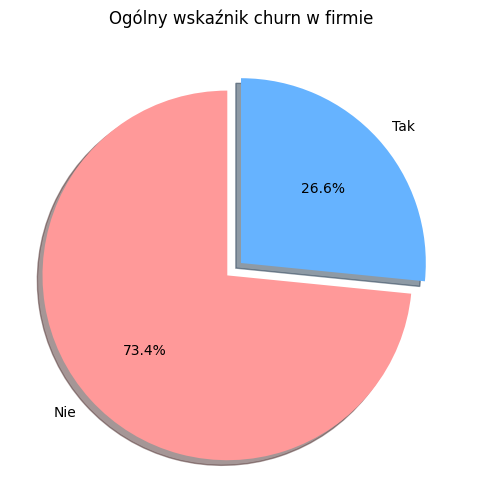

In [15]:
sizes = df["Churn"].value_counts(normalize=True) * 100
labels = sizes.index.tolist()
labels_pl = ['Nie','Tak']

# parametry wizualizacji
colors = ["#ff9999", "#66b3ff"]
explode = (0.1, 0)  # lekkie wysunięcie dla pierwszej kategorii

# tworzenie wykresu kołowego
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels_pl, colors=colors, autopct="%1.1f%%",
        startangle=90, explode=explode, shadow=True)
plt.title("Ogólny wskaźnik churn w firmie")
plt.show()

Utrata w ostatnim miesiącu ponad 25% klientów wskazuje na znaczący problem biznesowy

##### 2. Wpływ zmiennych demograficznych na churn

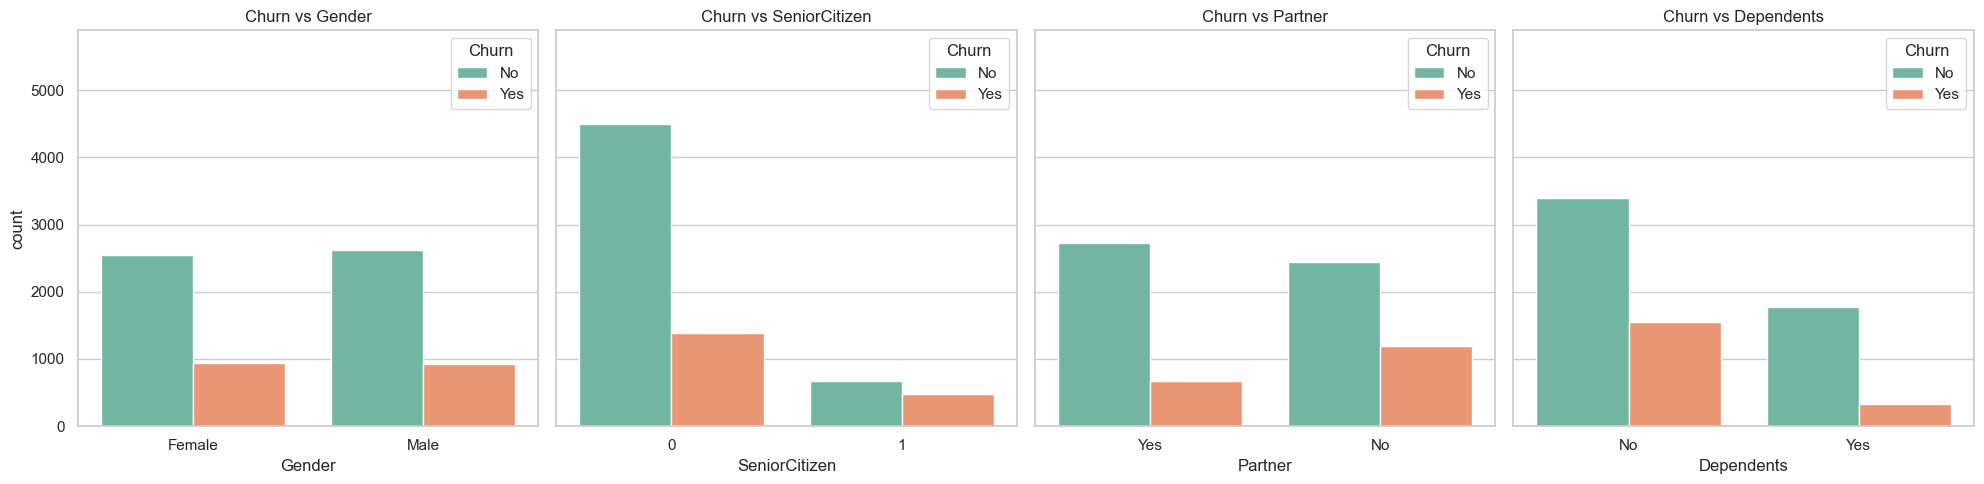

In [16]:
sns.set(style="whitegrid")

# Tworzenie subplots w jednym wierszu
fig, axes = plt.subplots(1, len(demographic_cols), figsize=(20, 5), sharey=True)

for i, col in enumerate(demographic_cols):
    sns.countplot(data=df, x=col, hue="Churn", ax=axes[i], palette="Set2")
    axes[i].set_title(f"Churn vs {col}")
    axes[i].legend(title="Churn", loc="upper right")

# Ustawienie wspólnej maksymalnej wartości osi Y
max_count = max(df[col].value_counts().max() for col in demographic_cols)
for ax in axes:
    ax.set_ylim(0, max_count)

plt.tight_layout()
plt.show()


In [17]:
# Funkcja do tworzenia tabeli podsumowującej
def churn_summary(df, col):
    summary = (
        df.groupby([col, "Churn"])
        .size()
        .unstack(fill_value=0)
    )
    # dodanie procentów
    summary["Total"] = summary.sum(axis=1)
    summary["Churn_%"] = (summary["Yes"] / summary["Total"] * 100).round(1)
    return summary

# tworzenie zestawienia dla każdej kolumny
tables = {}
for col in demographic_cols:
    tables[col] = churn_summary(df, col)

# wyświetlenie wyników
for col, table in tables.items():
    print(f"\n--- {col} ---")
    print(table)


--- Gender ---
Churn     No  Yes  Total  Churn_%
Gender                           
Female  2544  939   3483     27.0
Male    2619  930   3549     26.2

--- SeniorCitizen ---
Churn            No   Yes  Total  Churn_%
SeniorCitizen                            
0              4497  1393   5890     23.7
1               666   476   1142     41.7

--- Partner ---
Churn      No   Yes  Total  Churn_%
Partner                            
No       2439  1200   3639     33.0
Yes      2724   669   3393     19.7

--- Dependents ---
Churn         No   Yes  Total  Churn_%
Dependents                            
No          3390  1543   4933     31.3
Yes         1773   326   2099     15.5


Jak widać na powyższych zestawieniach, spośród analizowanych zmiennych demograficznych, posiadanie partnera, czy też osoby na utrzymaniu nie decydowało o odejściu.  
W większości zrezygnowały osoby młode i samotne (bez partnera, czy osób na utrzymaniu).  
Płeć nie miała w tym przypadku znaczenia, bo churn był niemal identyczny zarówno dla kobiet jak i mężczyzn.
Warto zauważyć, że w przypadku seniorów zanotowano duży odsetek rezygnacji (ponad 40%).

##### 3. Związek rodzaju umowy z (miesięczna, roczna, dwuletnia) rezygnacją klientów

Churn             No   Yes  Total  Churn_%
Contract                                  
Month-to-month  2220  1655   3875    42.71
One year        1306   166   1472    11.28
Two year        1637    48   1685     2.85


C:\Users\piter\AppData\Local\Temp\ipykernel_9828\2411373339.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=contract_churn_crosstab.reset_index(), x="Contract", y="Churn_%", palette="Set2")


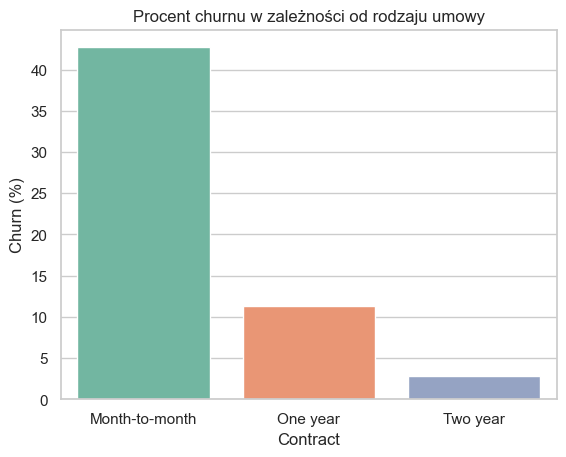

In [18]:
# Załóżmy, że masz DataFrame df z kolumnami 'Contract' i 'Churn'

# Tabela krzyżowa: liczności
contract_churn_crosstab = pd.crosstab(df["Contract"], df["Churn"])

# Dodanie procentów churnu
contract_churn_crosstab["Total"] = contract_churn_crosstab.sum(axis=1)
contract_churn_crosstab["Churn_%"] = (contract_churn_crosstab["Yes"] / contract_churn_crosstab["Total"] * 100).round(2)

print(contract_churn_crosstab)

# Wizualizacja: procent churnu dla każdego rodzaju umowy
sns.barplot(data=contract_churn_crosstab.reset_index(), x="Contract", y="Churn_%", palette="Set2")
plt.title("Procent churnu w zależności od rodzaju umowy")
plt.ylabel("Churn (%)")
plt.show()

In [19]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(pd.crosstab(df["Contract"], df["Churn"]))
print("Chi2:", chi2, "p-value:", p)

if p<0.05:
    print('p<0.05. Istnieje istotny związek między rodzajem umowy, a churnem.')
else:
    print('Nie istnieje istotny związek między rodzajem umowy, a churnem.')

Chi2: 1179.5458287339445 p-value: 7.326182186265472e-257
p<0.05. Istnieje istotny związek między rodzajem umowy, a churnem.


Jak pokazuje powyższe zestawienie oraz przeprowadzony test chi-kwadrat, istnieje istotny związek pomiędzy rodzajem umowy, a rezygnacją klientów.  
Zdecydowanie najwyższy churn odnotowany został w grupie klientów z umową miesięczną. Nie ma w tym nic dziwnego, ponieważ z umowy takiej można zrezygnować niemal z dnia na dzień.  
Zaskakująco wysoka jest za to skala rezygnacji w tej grupie (ponad 40%). Być może w tym czasie, na rynku pojawiła się nowa, bardziej interesująca oferta, która spowdowowała zmianę dostawcy usługi.

##### 4. Zależność między wysokością miesięcznych opłat (MonthlyCharges), a churnem

Wykorzystuję w tym celu histogramu oraz wykres gęstości.

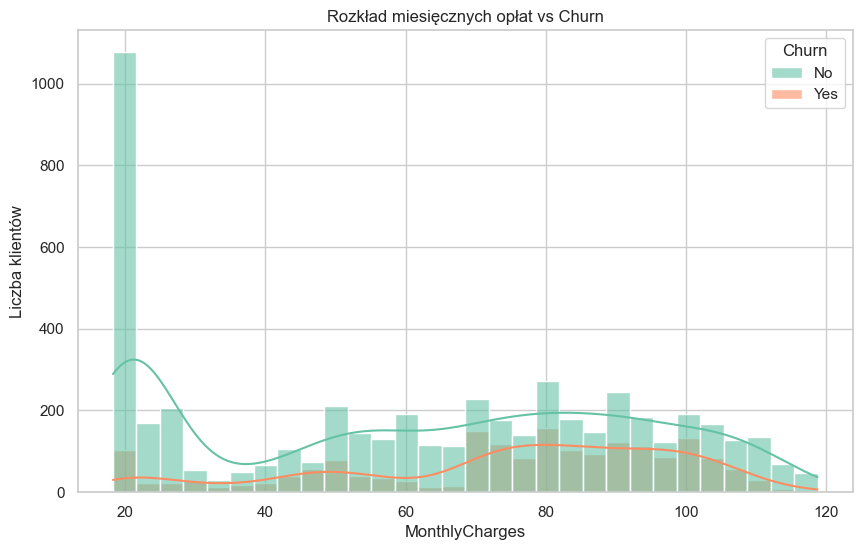

In [20]:
sns.set(style="whitegrid")

plt.figure(figsize=(10,6))

# Histogram z gęstością i automatyczną legendą
sns.histplot(data=df, x="MonthlyCharges", hue="Churn",
             bins=30, kde=True, palette="Set2", alpha=0.6, legend=True)

plt.title("Rozkład miesięcznych opłat vs Churn")
plt.xlabel("MonthlyCharges")
plt.ylabel("Liczba klientów")
plt.show()

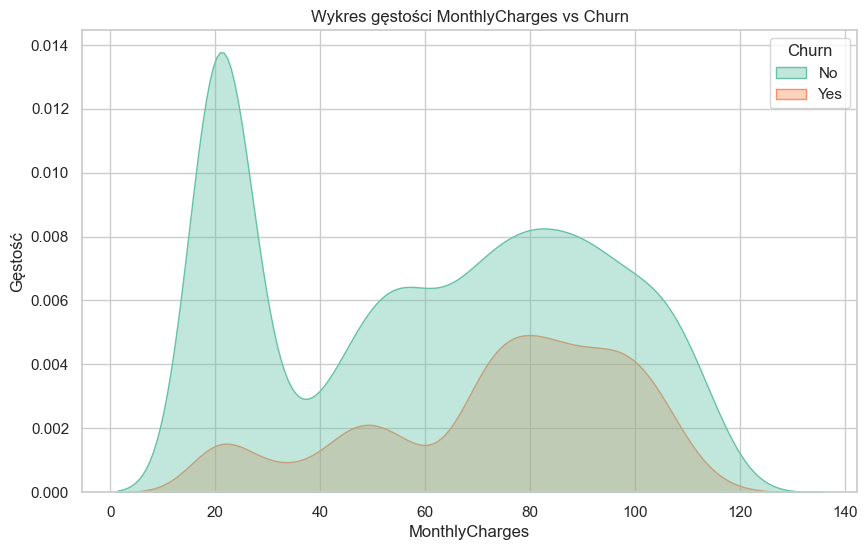

In [21]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn", fill=True, palette="Set2", alpha=0.4)
plt.title("Wykres gęstości MonthlyCharges vs Churn")
plt.xlabel("MonthlyCharges")
plt.ylabel("Gęstość")
plt.show()

Churn częściej występuje przy wyższych opłatach miesięcznych, co widać jako przesunięcie krzywej dla grupy oznaczonej Churn-Yes.  
Może to potwierdzać tezę postawioną w porpzednim punkcie, że oferta stała się nieatrakcyjna dla klientów (za wysok cena i/lub pojawiła się oferta innnego dostawcy na rynku, która jest atrakcyjniejsza)

##### 5. Usługi (np. streaming TV, filmy, wsparcie techniczne) najczęściej powiązane z niższym wskaźnikiem churnu

                         No  No internet service    Churn_%
OnlineSecurity    41.778667             7.434211  14.640199
TechSupport       41.647465             7.434211  15.196078
DeviceProtection  39.140271             7.434211  22.539289
StreamingMovies   33.728875             7.434211  29.952398
StreamingTV       33.535066             7.434211  30.114687


C:\Users\piter\AppData\Local\Temp\ipykernel_9828\3661071035.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_rates.reset_index(), x="index", y="Churn_%", palette="Set2")


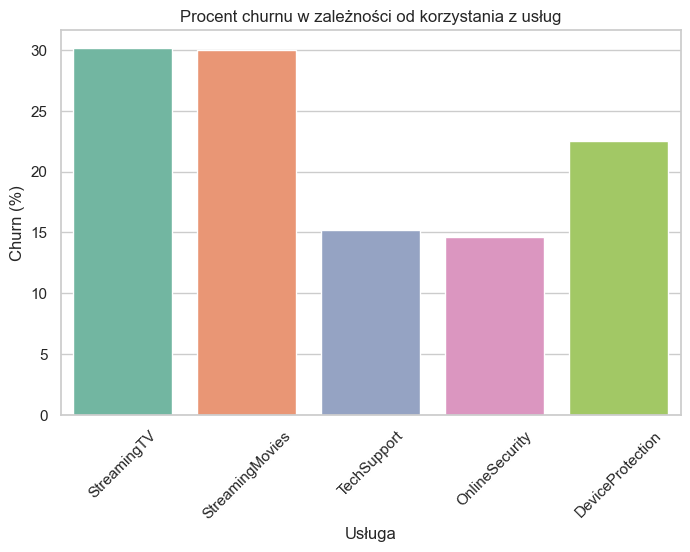

In [22]:
services = ["StreamingTV", "StreamingMovies", "TechSupport", 
            "OnlineSecurity", "DeviceProtection"]

results = {}

for service in services:
    summary = (
        df.groupby(service)["Churn"]
        .value_counts(normalize=True)
        .unstack(fill_value=0) * 100
    )
    # wybieramy tylko kolumnę "Yes" (procent churnu)
    results[service] = summary["Yes"]

# łączymy wyniki w jeden DataFrame
churn_rates = pd.DataFrame(results)

# teraz masz jedną kolumnę z procentami churnu
churn_rates = churn_rates.T.rename(columns={"Yes": "Churn_%"})

print(churn_rates.sort_values("Churn_%"))

# wizualizacja
plt.figure(figsize=(8,5))
sns.barplot(data=churn_rates.reset_index(), x="index", y="Churn_%", palette="Set2")
plt.title("Procent churnu w zależności od korzystania z usług")
plt.xlabel("Usługa")
plt.ylabel("Churn (%)")
plt.xticks(rotation=45)
plt.show()

In [23]:
# Lista usług do analizy
services = ["StreamingTV", "StreamingMovies", "TechSupport", 
            "OnlineSecurity", "DeviceProtection"]

results = {}

for service in services:
    summary = (
        df.groupby(service)["Churn"]
        .value_counts(normalize=True)
        .unstack(fill_value=0) * 100
    )
    # zapisujemy zarówno churn (Yes) jak i pozostanie (No)
    results[service] = summary[["Yes", "No"]]

# Łączenie wyników w jedną tabelę
churn_rates = pd.concat(results, axis=0)
churn_rates = churn_rates.rename(columns={"Yes": "Churn_%", "No": "NoChurn_%"})

# Wyświetlenie tabeli z kolorowaniem
styled_table = churn_rates.style.background_gradient(
    subset=["Churn_%"], cmap="Reds"  # churn na czerwono
).background_gradient(
    subset=["NoChurn_%"], cmap="Greens"   # pozostanie na zielono
).format("{:.1f}%")

styled_table

W tabeli powyżej przedstawiłem churn wg rodzaju usług. Yes - oznacza użytkowników, którzy z uruchomioną daną usługę, No - z nieaktywną usługą, a No internet service oznacza klientów, którzy w ogóle nie mają internetu, więc automatycznie nie mogą mieć usług streamingowych.  
W przypadku klientów bez internetu zanotowany jest bardzo niski churn, bo to często osoby z prostszymi usługami (np. tylko telefon), które rzadziej rezygnują.


In [25]:
from itertools import combinations

# Lista usług do analizy
services = ["StreamingTV", "StreamingMovies", "TechSupport", 
            "OnlineSecurity", "DeviceProtection"]

results = []

# Iterujemy po wszystkich parach usług
for s1, s2 in combinations(services, 2):
    summary = (
        df.groupby([s1, s2])["Churn"]
        .value_counts(normalize=True)
        .unstack(fill_value=0) * 100
    )
    # dodajemy do wyników każdą kombinację
    for idx, row in summary.iterrows():
        churn_pct = row.get("Yes", 0)
        results.append({
            "Usługa 1": s1,
            "Usługa 2": s2,
            "Wariant": idx,
            "Churn_%": churn_pct
        })

# Tworzymy DataFrame z wynikami
churn_pairs = pd.DataFrame(results)

# Sortujemy malejąco po churnie
top5 = churn_pairs.sort_values("Churn_%", ascending=False).head(5)

print(top5)

           Usługa 1          Usługa 2   Wariant    Churn_%
35      TechSupport    OnlineSecurity  (No, No)  48.962005
45   OnlineSecurity  DeviceProtection  (No, No)  47.050754
40      TechSupport  DeviceProtection  (No, No)  46.371681
10      StreamingTV    OnlineSecurity  (No, No)  43.369565
25  StreamingMovies    OnlineSecurity  (No, No)  42.958129


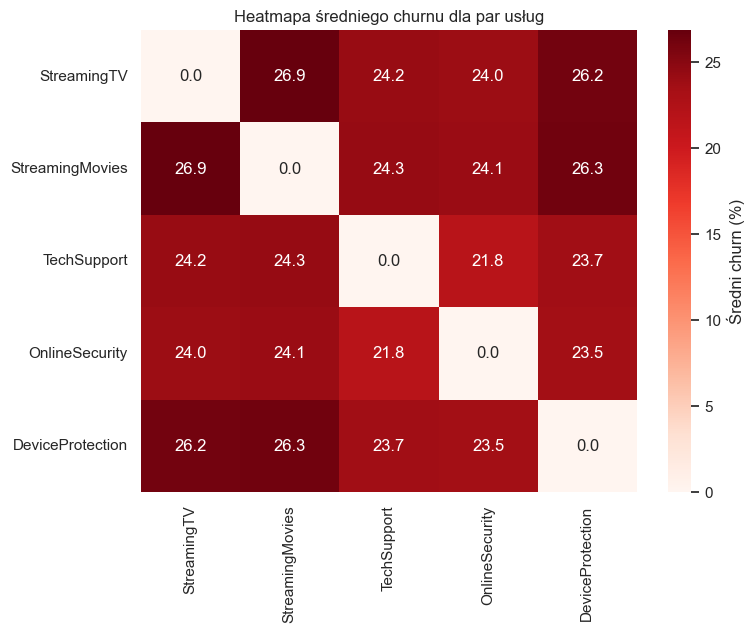

In [ ]:
# Tworzymy macierz średnich wartości churn dla par usług
heatmap_data = pd.DataFrame(index=services, columns=services, dtype=float)

for s1, s2 in combinations(services, 2):
    summary = (
        df.groupby([s1, s2])["Churn"]
        .value_counts(normalize=True)
        .unstack(fill_value=0) * 100
    )
    # średni churn dla tej pary usług
    avg_churn = summary["Yes"].mean()
    heatmap_data.loc[s1, s2] = avg_churn
    heatmap_data.loc[s2, s1] = avg_churn  # symetrycznie

# Uzupełniamy przekątną zerami (brak pary z samą sobą)
for s in services:
    heatmap_data.loc[s, s] = 0

# Wizualizacja heatmapy
plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="Reds", cbar_kws={'label': 'Średni churn (%)'})
plt.title("Heatmapa średniego churnu dla par usług")
plt.show()

Powyższe zestawienia pokazują, że najwyższy churn dotyczy klientów, którzy nie posiadają usług związanych z bezpieczeństwem i wsparciem (TechSupport, OnlineSecurity), a najniższy w przypadku klintów, którzy posiadają te usługi, co może oznaczać, że stanowią one istotną wartość dodaną i warto byłoby je włączać do propozycji nowej oferty.  
Najwyższy churn dla par usług związanych ze streamingiem może oznaczać, że pojawiły się konkurencyjne i bardziej atrakcyjne oferty na rynku i klientci zdecydowali się na zmiany usługodawcy streamingowego.

##### 6. Zmienne numeryczne - macierz korelacji

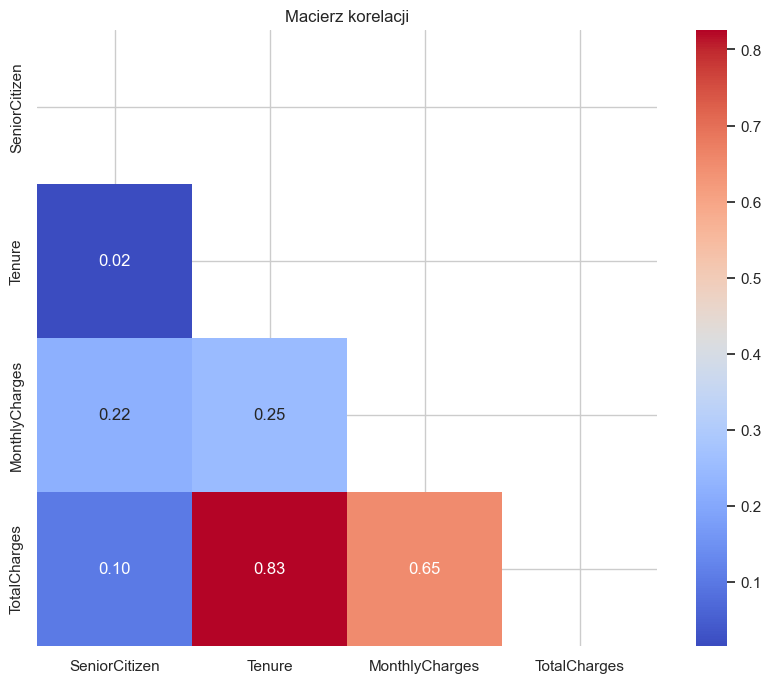

In [ ]:
# Wybór tylko zmiennych numerycznych
numeric_df = df.select_dtypes(include=["int64", "float64"])

# Obliczenie macierzy korelacji
corr_matrix = numeric_df.corr()

# Wyzerowanie wartości powyżej przekątnej
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Macierz korelacji")
plt.show()

Powyższy diagram pokazuje silną korelację pomiędzy całkowitymi wydatkami klientów a liczbą miesięcy przez które klienci korzystali z usług, co pokazuje, że lojalny klient to klient bardziej dochodowy.

##### 7. Czy klienci korzystający z płatności elektronicznych (electronic check) są bardziej skłonni do rezygnacji niż pozostali

Churn              No   Yes  Total  Churn_%
ElectronicCheck                            
False            3869   798   4667    17.10
True             1294  1071   2365    45.29


C:\Users\piter\AppData\Local\Temp\ipykernel_9828\3780260947.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_table.reset_index(), x="ElectronicCheck", y="Churn_%", palette="Set2")


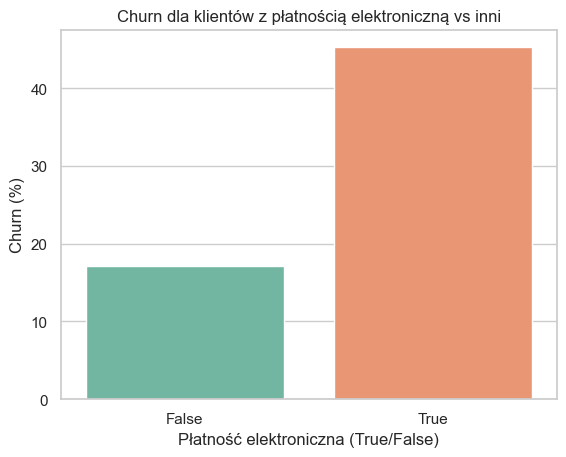

In [39]:
# Tworzymy nową kolumnę: czy klient używa electronic check
df["ElectronicCheck"] = df["PaymentMethod"].apply(lambda x: "Electronic check" in x)

# Tabela krzyżowa: liczności churnu
churn_table = pd.crosstab(df["ElectronicCheck"], df["Churn"])

# Dodanie procentów churnu
churn_table["Total"] = churn_table.sum(axis=1)
churn_table["Churn_%"] = (churn_table["Yes"] / churn_table["Total"] * 100).round(2)

print(churn_table)

# Wizualizacja
sns.barplot(data=churn_table.reset_index(), x="ElectronicCheck", y="Churn_%", palette="Set2")
plt.title("Churn dla klientów z płatnością elektroniczną vs inni")
plt.xlabel("Płatność elektroniczna (True/False)")
plt.ylabel("Churn (%)")
plt.show()

Powyższe zestawienie pokazuje, że płacący elektornicznie byli bardziej skłonni do rezygnacji. Churn w ich przypadku wynosi około 45%, co jest bardzo wysokim wynikiem.

Churn                        No   Yes  Total  Churn_%
PaymentMethod                                        
Electronic check           1294  1071   2365    45.29
Mailed check               1296   308   1604    19.20
Bank transfer (automatic)  1284   258   1542    16.73
Credit card (automatic)    1289   232   1521    15.25


C:\Users\piter\AppData\Local\Temp\ipykernel_9828\828068871.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=payment_churn.reset_index(), x="PaymentMethod", y="Churn_%", palette="Set2")


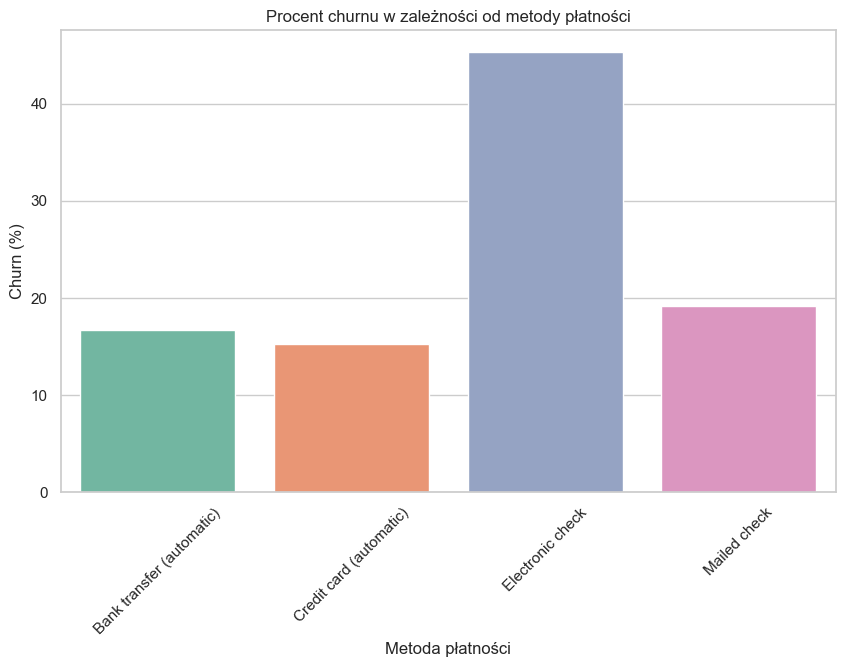

In [38]:
# Tabela krzyżowa: liczności churnu dla każdej metody płatności
payment_churn = pd.crosstab(df["PaymentMethod"], df["Churn"])

# Dodanie procentów churnu
payment_churn["Total"] = payment_churn.sum(axis=1)
payment_churn["Churn_%"] = (payment_churn["Yes"] / payment_churn["Total"] * 100).round(2)

print(payment_churn.sort_values("Churn_%", ascending=False))

# Wizualizacja
plt.figure(figsize=(10,6))
sns.barplot(data=payment_churn.reset_index(), x="PaymentMethod", y="Churn_%", palette="Set2")
plt.title("Procent churnu w zależności od metody płatności")
plt.xlabel("Metoda płatności")
plt.ylabel("Churn (%)")
plt.xticks(rotation=45)
plt.show()

Zautomatyzowane metody płatności okazują się 'bezpieczniejsze' pod względem rezygnacji klientów.  
Prawdopodonmie dlatego, że rezygnacja musi być poprzedzona akcją ze strony klienta i manualnym anulowaniem subskrybcji.

##### 8. Rozkład całkowitych opłat (TotalCharges) - klienci, którzy odeszli vs klienci, którzy pozostali

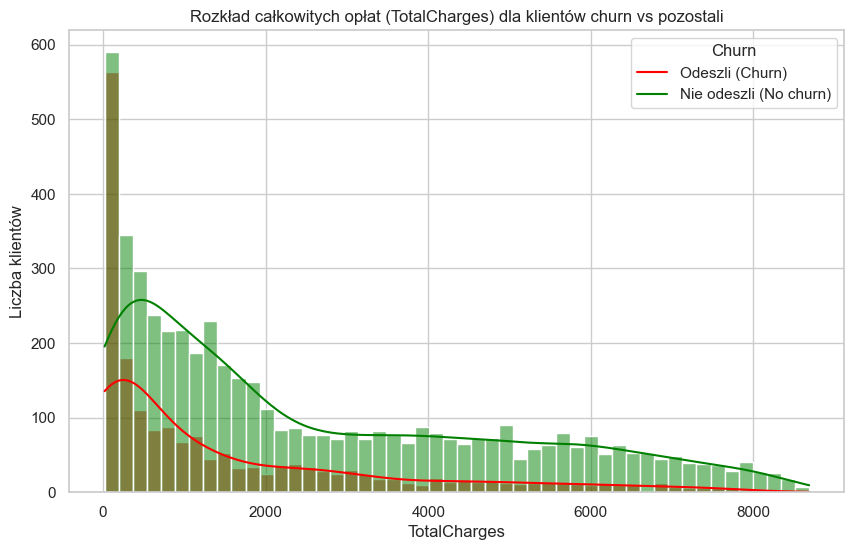

In [46]:
plt.figure(figsize=(10,6))

# Histogram z podziałem na churn
sns.histplot(data=df, x="TotalCharges", hue="Churn", kde=True, bins=50, palette={"Yes":"red","No":"green"}, alpha=0.5)

plt.title("Rozkład całkowitych opłat (TotalCharges) dla klientów churn vs pozostali")
plt.xlabel("TotalCharges")
plt.ylabel("Liczba klientów")
plt.legend(title="Churn", labels=["Odeszli (Churn)", "Nie odeszli (No churn)"])
plt.show()

C:\Users\piter\AppData\Local\Temp\ipykernel_9828\1282285226.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn", y="TotalCharges", palette={"Yes":"red","No":"green"})


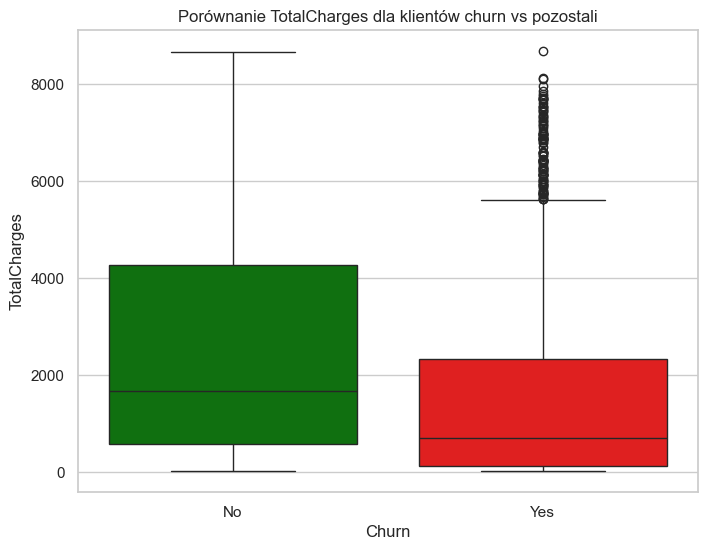

In [42]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Churn", y="TotalCharges", palette={"Yes":"red","No":"green"})

plt.title("Porównanie TotalCharges dla klientów churn vs pozostali")
plt.xlabel("Churn")
plt.ylabel("TotalCharges")
plt.show()

C:\Users\piter\AppData\Local\Temp\ipykernel_9828\1063507092.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Churn", y="TotalCharges", palette={"Yes":"red","No":"green"}, inner="box")


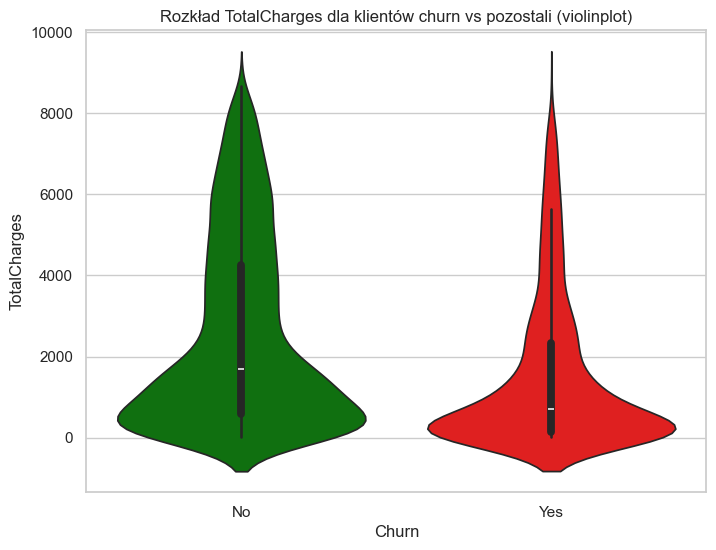

In [44]:
plt.figure(figsize=(8,6))
sns.violinplot(data=df, x="Churn", y="TotalCharges", palette={"Yes":"red","No":"green"}, inner="box")

plt.title("Rozkład TotalCharges dla klientów churn vs pozostali (violinplot)")
plt.xlabel("Churn")
plt.ylabel("TotalCharges")
plt.show()

In [58]:
print('Średnia wartość całkowitych wydatków wszystkich klientów:',df["TotalCharges"].mean().round(2))
print('Mediana całkowitych wydatków wszystkich klientów:',df["TotalCharges"].median().round(2))

Średnia wartość całkowitych wydatków wszystkich klientów: 2283.3
Mediana całkowitych wydatków wszystkich klientów: 1397.48


In [57]:
# Grupowanie po Churn i obliczenie średniej oraz mediany
stats = df.groupby("Churn")["TotalCharges"].agg(
    Średnia="mean",
    Mediana="median"
).round(2)

print("Średnia i mediana całkowitych wydatków dla klientów churn vs pozostali:")
print(stats)


Średnia i mediana całkowitych wydatków dla klientów churn vs pozostali:
       Średnia  Mediana
Churn                  
No     2555.34  1683.60
Yes    1531.80   703.55


Przedstawione statystki pokazują, że klienci, którzy odeszli mieli średnio niższe wydatki całkowite od klientów, którzy nie odeszli. Potwierdzają to wyraźnie wartości średnie i mediany dla obu grup

##### Podsumowanie

Wyniki analizy pokazują, że warto podjąć działania i zmiany w ofercie: 
- utrzymać dotychczasowych klientów, bo generują oni większe zyski,
- uwzględnić w ofercie usługi związane ze wsparciem technicznym oraz bezpieczeństwem w internecie,
- uatrakcyjnić oferty streamingowe,  
- zachęcić do wyboru automatycznych płatności  
- przygotować oferty dla osób względnie młodych i seniorów.